## The `caption` module

This document reviews the `caption` module - which takes as input an image and returns a text description of the input image.  Output data is returned as a json.

This document includes an overview of custom pipeline setup, current model set, parameters, and `.process` usage for this module.

To follow along with this demonstration be sure to initialize your krixik session with your api key and url as shown below. 

We illustrate loading these required secrets in via [python-dotenv](https://pypi.org/project/python-dotenv/), storing those secrets in a `.env` file.  This is always good practice for storing / loading secrets (e.g., doing so will reduce the chance you inadvertantly push secrets to a repo).

In [1]:
import sys 
sys.path.append('../../')
from docs.utilities.reset import reset_pipeline

In [2]:
# load secrets from a .env file using python-dotenv
from dotenv import load_dotenv
import os
load_dotenv("../.env")
MY_API_KEY = os.getenv('MY_API_KEY')
MY_API_URL = os.getenv('MY_API_URL')

# import krixik and initialize it with your personal secrets
from krixik import krixik
krixik.init(api_key = MY_API_KEY, 
            api_url = MY_API_URL)

SUCCESS: You are now authenticated.


This small function prints dictionaries very nicely in notebooks / markdown.

In [3]:
# print dictionaries / json nicely in notebooks / markdown
import json
def json_print(data):
    print(json.dumps(data, indent=2))

A table of contents for the remainder of this document is shown below.


- [pipeline setup](#pipeline-setup)
- [required input format](#required-input-format)
- [using the default model](#using-the-default-model)
- [using a non-default model](#using-a-non-default-model)


## Pipeline setup

Below we setup a simple one module pipeline using the `caption` module.  We do this by passing the module name to the `module_chain` argument of [`.create_pipeline`](LINK HERE) along with a name for our pipeline.

In [4]:
# create a pipeline with a single module
pipeline = krixik.create_pipeline(name="my-caption-pipeline",
                                  module_chain=["caption"])

The `caption` module comes with a subset of popular caption models including the following:

- [vit-gpt2-image-captioning](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning) (default)
- [git-base](https://huggingface.co/microsoft/git-base)
- [blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base)
- [blip-image-captioning-large](https://huggingface.co/Salesforce/blip-image-captioning-large)

These available modeling options and parameters are stored in our custom pipeline's configuration (described further in LINK HERE).  We can examine this configuration as shown below.

In [5]:
# nicely print pipeline configuration
json_print(pipeline.config)

{
  "pipeline": {
    "name": "my-caption-pipeline",
    "modules": [
      {
        "name": "caption",
        "models": [
          {
            "name": "vit-gpt2-image-captioning"
          },
          {
            "name": "git-base"
          },
          {
            "name": "blip-image-captioning-base"
          },
          {
            "name": "blip-image-captioning-large"
          }
        ],
        "defaults": {
          "model": "vit-gpt2-image-captioning"
        },
        "input": {
          "type": "image",
          "permitted_extensions": [
            ".jpg",
            ".jpeg",
            ".png"
          ]
        },
        "output": {
          "type": "json"
        }
      }
    ]
  }
}


Here we can see the models and their associated parameters available for use.

You can save this configuration to disk as well by executing


```python
pipeline.save("/valid/path/file.yml")
```

You can instantiate a pipeline directly from its configuration using the [.load_pipeline method](LINK HERE).

In [6]:
# delete all processed datapoints belonging to this pipeline
reset_pipeline(pipeline)

## Required input format

The `caption` module accepts `.png`, `.jpg`, and `.jpeg` images as input.

Lets take a quick look at a valid input file - and then process it.

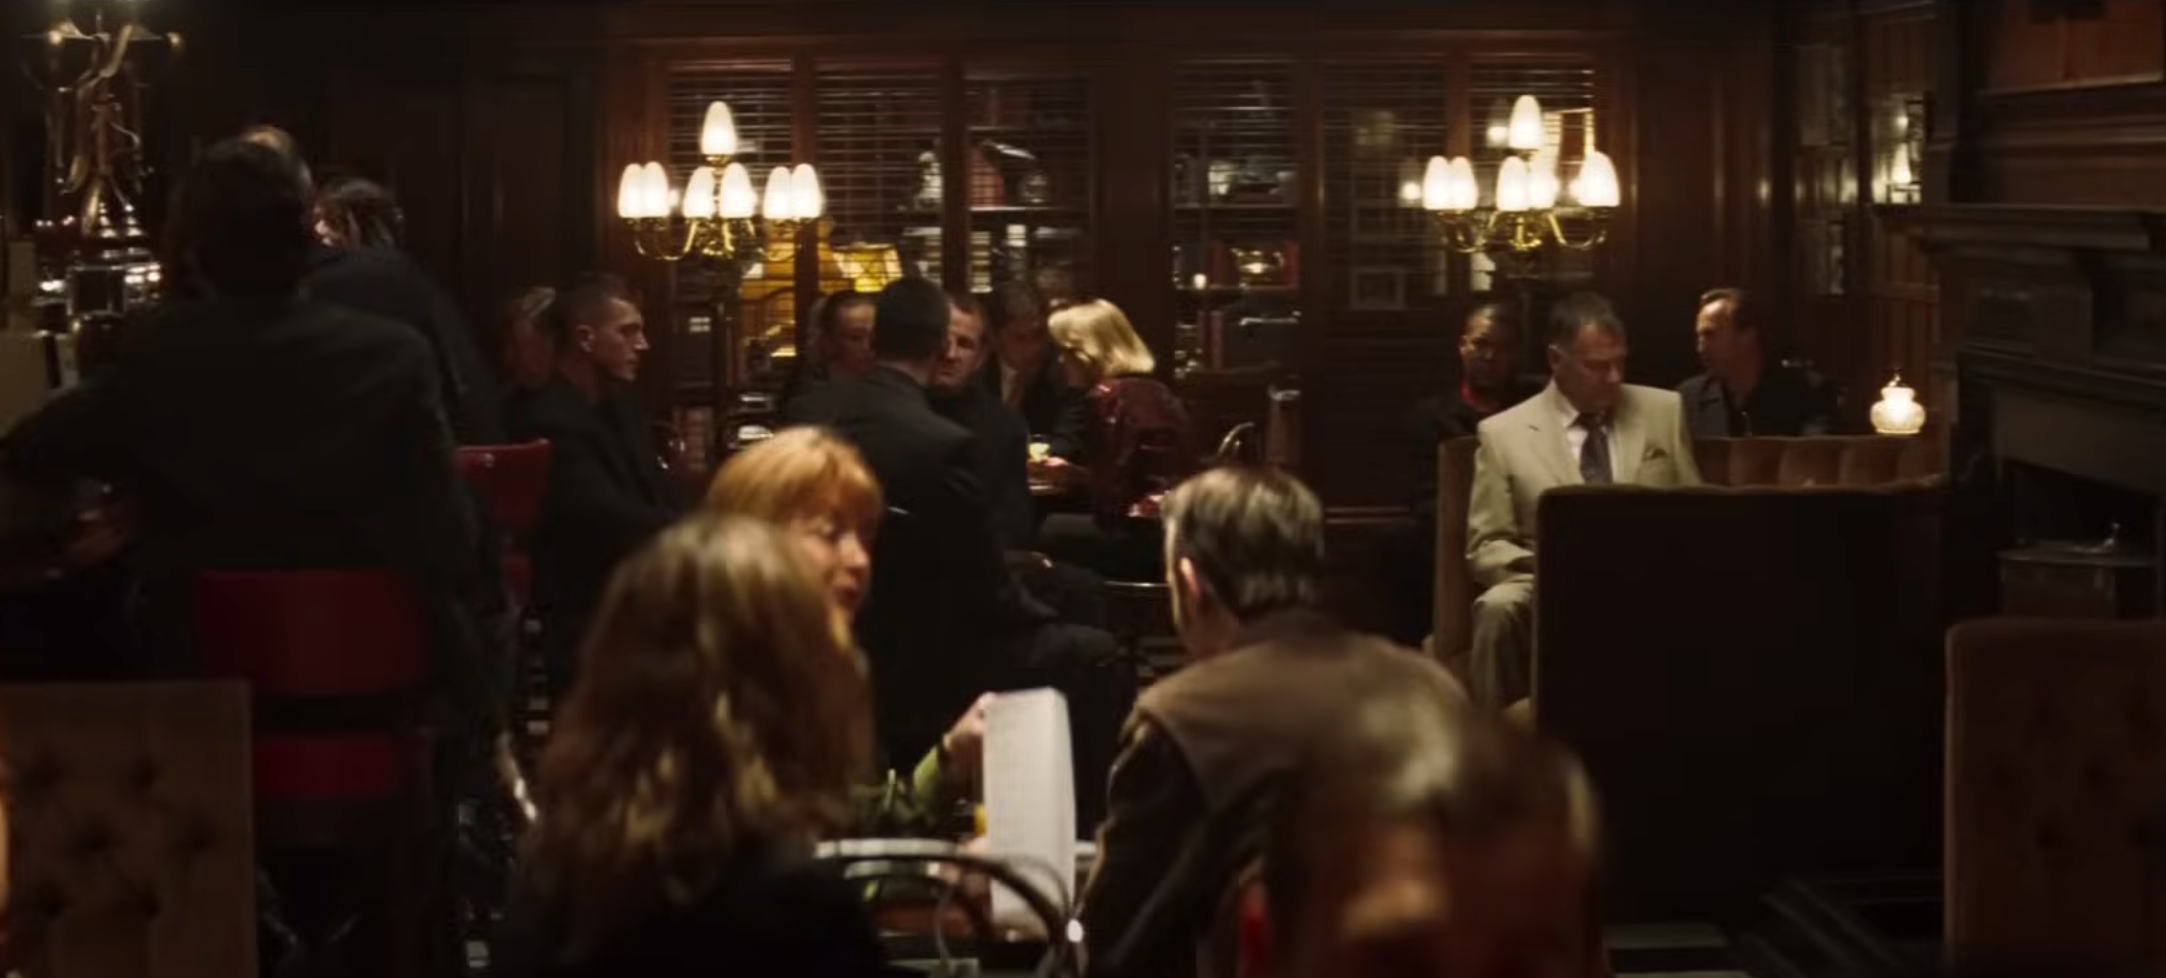

In [7]:
# examine contents of a valid input file
test_file = "../input_data/resturant.png"
from IPython.display import Image
Image(filename=test_file) 

## Using the default model

Let's process our test input file using the `default` model - `vit-gpt2-image-captioning`.  Because this is the default model we need not input the optional `modules` argument into `.process`.

In [8]:
# define path to an input file
test_file = "../input_data/resturant.png"

# process for search
process_output = pipeline.process(local_file_path = test_file,
                                  local_save_directory=".", # save output in current directory
                                  expire_time=60*5,         # set all process data to expire in 5 minutes
                                  wait_for_process=True,    # wait for process to complete before regaining ide
                                  verbose=False)            # set verbosity to False

The output of this process is printed below.  Because the output of this particular module-model pair is json, the process output is provided in this object as well.  The output file itself has been returned to the address noted in the `process_output_files` key.  The `file_id` of the processed input is used as a filename prefix for the output file.

In [9]:
# nicely print the output of this process
json_print(process_output)

{
  "status_code": 200,
  "pipeline": "my-caption-pipeline",
  "request_id": "95da0bae-6141-4aeb-b032-08c238e4f065",
  "file_id": "0e381a4d-e3a1-43bb-b6ce-c21ed0c32aaa",
  "message": "SUCCESS - output fetched for file_id 0e381a4d-e3a1-43bb-b6ce-c21ed0c32aaa.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": [
    {
      "caption": "a large group of people are in a restaurant"
    }
  ],
  "process_output_files": [
    "./0e381a4d-e3a1-43bb-b6ce-c21ed0c32aaa.json"
  ]
}


We load in the text file output from `process_output_files` below. 

In [10]:
# load in process output from file
import json
json_print(json.load(open(process_output['process_output_files'][0])))

[
  {
    "caption": "a large group of people are in a restaurant"
  }
]


## Using a non-default model

To use a non-default model like `blip-image-captioning-base` we enter it explicitly as a `modules` selection when invoking `.process`.

In [11]:
# define path to an input file
test_file = "../input_data/resturant.png"

# process for search
process_output = pipeline.process(local_file_path = test_file,
                                  local_save_directory=".", # save output in current directory
                                  expire_time=60*5,         # set all process data to expire in 5 minutes
                                  wait_for_process=True,    # wait for process to complete before regaining ide
                                  verbose=False,            # set verbosity to False
                                  modules={"caption":{"model":"blip-image-captioning-base"}})

The output of this process is printed below.  

Because the output of this particular module-model pair is json, the process output is provided in this object as well.  The output file itself has been returned to the address noted in the `process_output_files` key.  The `file_id` of the processed input is used as a filename prefix for the output file.

In [12]:
# nicely print the output of this process
json_print(process_output)

{
  "status_code": 200,
  "pipeline": "my-caption-pipeline",
  "request_id": "d3e6bc81-c71b-4866-aba0-d8c440586d7d",
  "file_id": "7c33bf7c-3957-4a66-9856-25d80746e74f",
  "message": "SUCCESS - output fetched for file_id 7c33bf7c-3957-4a66-9856-25d80746e74f.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": [
    {
      "caption": "a group of people sitting around a bar"
    }
  ],
  "process_output_files": [
    "./7c33bf7c-3957-4a66-9856-25d80746e74f.json"
  ]
}
